<a href="https://colab.research.google.com/github/Webiwo/publications/blob/main/medical_charges_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

* Exploratory Data Analysis (EDA) is the process of examining and understanding a dataset before applying formal modeling or statistical techniques.

* It’s the first step in any data analysis or machine learning project, where the goal is to discover patterns, detect anomalies, test assumptions, and gain insights through summary statistics and visualizations. EDA helps you let the data speak for itself — instead of starting with hypotheses, you explore to find what’s interesting or unexpected.

### Typical steps in exploratory analysis:

1. Understand the structure of the data
     * Check how many rows and columns there are
     * Identify data types (numeric, categorical, date/time, etc.)
     * Look for missing or inconsistent values

2. Summarize the data
     * Use descriptive statistics (mean, median, standard deviation, min/max, etc.)
     * Count unique values for categorical features

3. Visualize distributions and relationships
     * Histograms, box plots - show distributions and outliers
     * Scatter plots, pair plots - reveal relationships between variables
     * Heatmaps - show correlations

4. Detect anomalies or patterns
     * Spot unusual values, trends, or clusters in the data.

5. Form hypotheses for further analysis
     * After exploring, you can decide what might be worth modeling or testing statistically.

## Problem Statement

ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

### Preparing a dataset

In [10]:
import pandas as pd

medical_df = pd.read_csv("./data/medical-charges.csv")
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Analysis and Visualization

In [13]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


### Age

In [14]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [15]:
fig = px.histogram(
    medical_df,
    x="age",
    marginal="box",
    nbins=47,
    title="Age Distribution",
)

fig.update_layout(bargap=0.1, width=900, height=500)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. Why there are over twice as many customers with ages 18 and 19, compared to other ages?

### Body Mass Index

In [16]:
fig = px.histogram(
    medical_df,
    x="bmi",
    marginal="box",
    title="Body Mass Index (BMI) Distribution",
)

fig.update_layout(bargap=0.1, width=900, height=500)
fig.show()

The measurements of body mass index seem to form a Gaussian distribution centered around the value 30, with a few outliers towards the right.

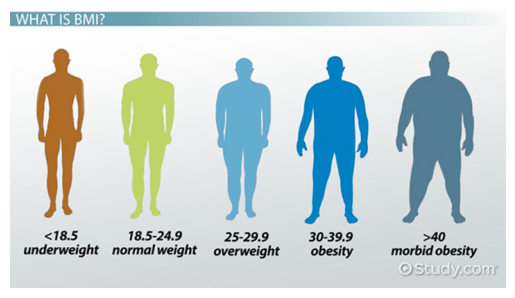

In [17]:
import matplotlib.image as mpimg

img = mpimg.imread("./data/bmi.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

### Charges

In [18]:
from turtle import color


fig = px.histogram(
    medical_df,
    x="charges",
    marginal="box",
    color="smoker",
    color_discrete_map={"yes": "red", "no": "green"},
    title="Medical Charges Distribution by Smoking Status",
)

fig.update_layout(bargap=0.1, width=900, height=500)
fig.show()

For most customers, the annual medical charges are under $14,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law" - this creates a long tail in the distribution.
There is a significant difference in medical expenses between smokers and non-smokers.

### Sex

In [19]:
medical_df.sex.value_counts()

,count
sex,
male,676
female,662


In [20]:
fig = px.histogram(
    medical_df,
    x="sex",
    color="region",
    title="Sex Distribution",
    width=900,
    height=500
)

fig.update_layout(bargap=0.1, width=900, height=500)
fig.show()

### Smoker

In [21]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [22]:
fig = px.histogram(
    medical_df,
    x="smoker",
    color="sex",
    title="Smoking Status by Sex",
)

fig.update_layout(bargap=0.1, width=900, height=500)
fig.show()

In [23]:
### Children
fig = px.histogram(
    medical_df,
    x="children",
    color="region",
    title="Number of Children Distribution",
    width=900,
    height=500)

fig.update_layout(bargap=0.1, width=900, height=500)
fig.show()

### Age vs. Charges

In [24]:
fig = px.scatter(
    medical_df,
    x='age',
    y='charges',
    color='smoker',
    opacity=0.8,
    hover_data=['bmi', 'sex', "children"],
    title="Age vs. Medical Charges",
)

fig.update_traces(marker=dict(size=7))
fig.update_layout(width=900, height=500)
fig.show()

We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

* The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
* The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
* The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

### BMI vs. Charges

In [25]:
fig = px.scatter(
    medical_df,
    x='bmi',
    y='charges',
    color='smoker',
    opacity=0.8,
    hover_data=['age', 'sex'],
    title="BMI vs. Medical Charges",
)

fig.update_traces(marker=dict(size=7))
fig.update_layout(width=900, height=500)


It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

### Children vs. Charges

In [26]:
fig = px.violin(
  medical_df,
  x='children',
  y='charges',
  title="Children vs. Medical Charges",
)

fig.update_layout(width=900, height=500)
fig.show()

### Region vs. Charges

In [27]:
fig = px.box(
    medical_df,
    x='region',
    y='charges',
    title="Region vs. Medical Charges"
)

fig.update_layout(width=900, height=500)
fig.show()

* Each box represents the distribution of medical charges within one region.
* The box shows the interquartile range (IQR) — the middle 50% of the data.
* The horizontal line inside the box is the median medical charge for that region.
* The “whiskers” (vertical lines extending from the box) show the typical range of values, excluding outliers.
* The dots above the whiskers represent outliers — unusually high medical charges.

### Smokers vs. Charges

In [28]:
fig = px.violin(
    medical_df,
    x="smoker",
    y="charges",
    title="Smokers vs. Medical Charges"
)

fig.update_layout(width=900, height=500)
fig.show()

## Correlation Matrix

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [29]:
medical_enc_df = medical_df.copy()

In [30]:
smoker_values = {"yes": 1, "no": 0}
medical_enc_df["smoker"] = medical_enc_df["smoker"].map(smoker_values)

In [31]:
sex_values = {"female":0, "male": 1}
medical_enc_df["sex"] =  medical_enc_df["sex"].map(sex_values)

In [32]:
medical_enc_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [33]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)

region_ohe = ohe.fit_transform(medical_enc_df[["region"]])
region_ohe_df = pd.DataFrame(
    region_ohe,
    columns=ohe.get_feature_names_out(["region"])
)

region_ohe_df.head(5)

,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [34]:
medical_enc_df = pd.concat([medical_enc_df, region_ohe_df], axis=1)
medical_enc_df.drop(columns=["region"], inplace=True)

medical_enc_df.head(5)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


In [35]:
medical_enc_df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


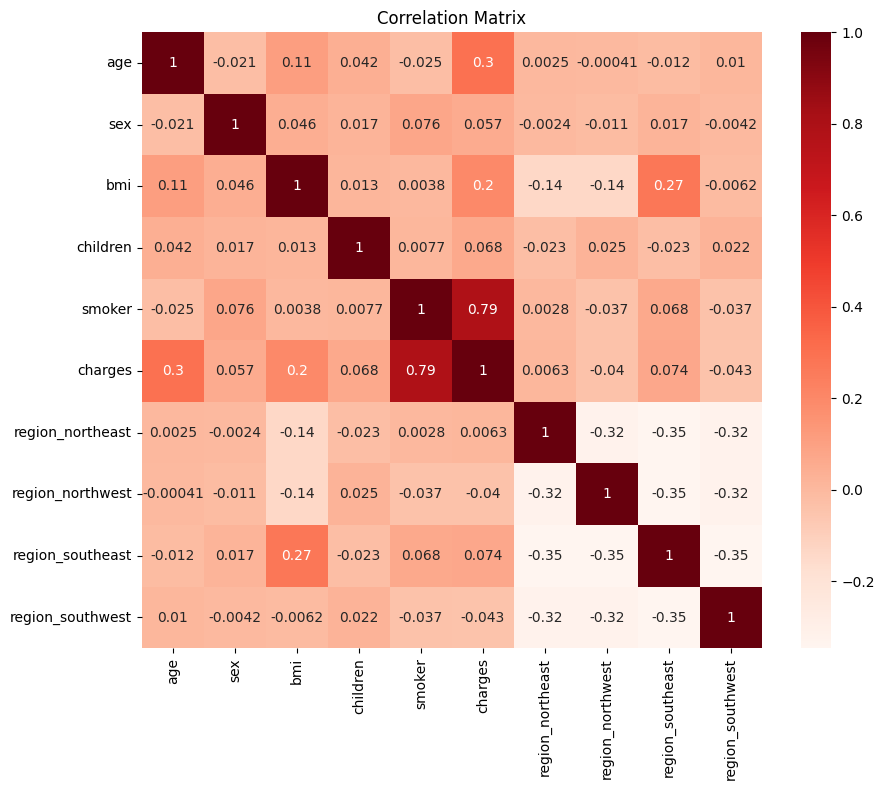

In [36]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    medical_enc_df.corr(),
    cmap="Reds",
    annot=True
)

plt.title("Correlation Matrix")
plt.show()

In [37]:
smoker_df = medical_enc_df[medical_enc_df["smoker"] == 1]
non_smoker_df = medical_enc_df[medical_enc_df["smoker"] == 0]

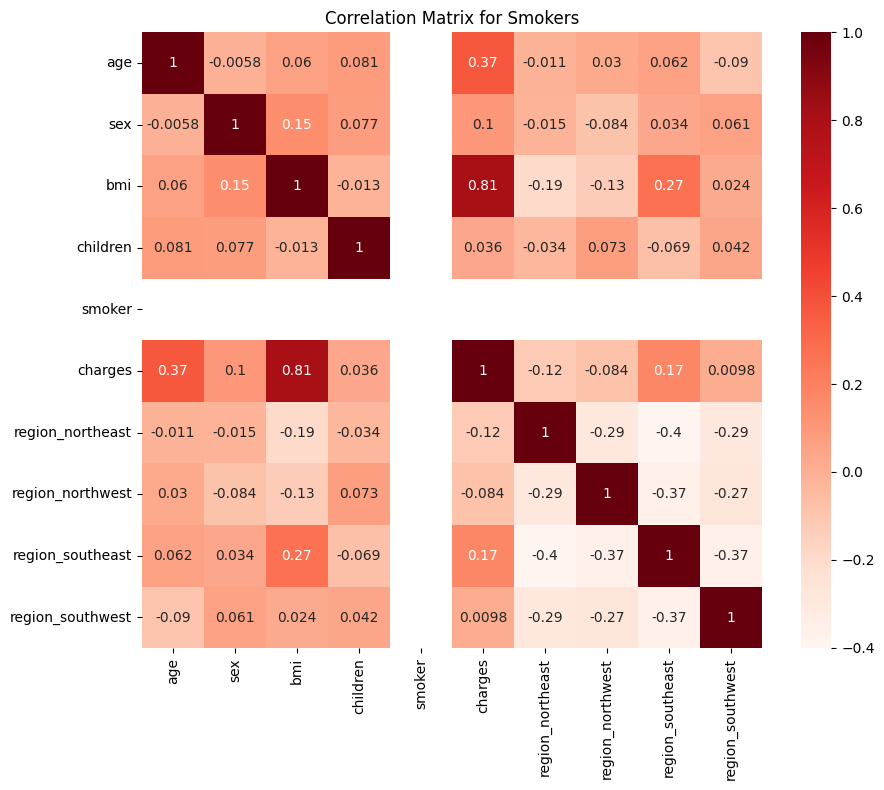

In [38]:
plt.figure(figsize=(10, 8))

sns.heatmap(smoker_df.corr(), cmap="Reds", annot=True)

plt.title("Correlation Matrix for Smokers")
plt.show()

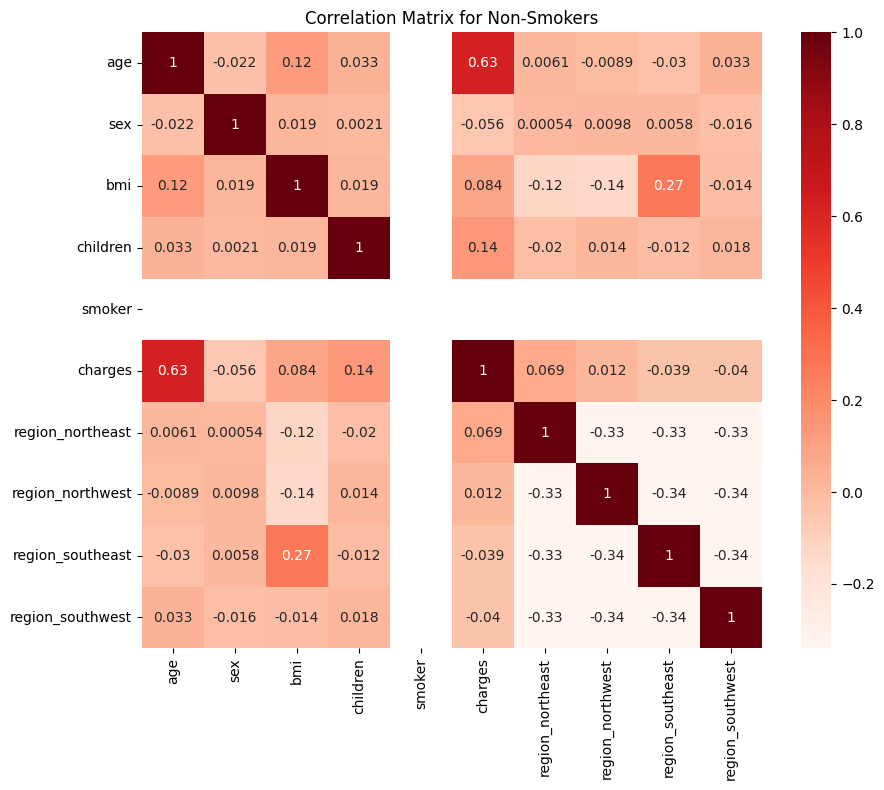

In [39]:
plt.figure(figsize=(10, 8))

sns.heatmap(non_smoker_df.corr(), cmap="Reds", annot=True)

plt.title("Correlation Matrix for Non-Smokers")
plt.show()

In [40]:
fig = px.scatter_3d(
    smoker_df,
    x='age',
    y='bmi',
    z='charges',
)

fig.update_layout(width=900, height=700)
fig.update_traces(marker=dict(size=3), marker_opacity=0.7)
fig.show()